In [48]:
import json
from pprint import pprint
import pickle
import matplotlib.pyplot as plt
from plotLayer import *
from preprocess import *

import os
import time
import numpy as np
from scipy import sparse as sp
from skimage.measure import block_reduce
from skimage.measure import compare_ssim as ssim

from model import *
from keras.backend.tensorflow_backend import set_session

def mse(A, B):
    err = np.sum((A.astype("float") - B.astype("float")) ** 2)
    err /= float(A.shape[1] * A.shape[2])
    return err

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

test_file_path = "../Data/testdataset/d0_sparse_dataset0500.dat"


#test_file_path = "../Data/testdataset/d0_sparse_dataset0500.dat"


#This is the model which Jason has created. 

unet_weights_path = "Unet_epoch_20_batch_4.hdf5"

width = 256
ratio = 1024 / width

config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.gpu_options.per_process_gpu_memory_fraction = 0.9
sess = tf.Session(config=config)
set_session(sess)

unet_model = Unet(input_size=(width,width,6), batch_normal=True)
unet_model.load_weights(unet_weights_path)

with open(test_file_path, "rb") as f:
    data = pickle.load(f)
vdata = data[0:1]

test_data = np.heaviside(np.array([map(lambda x: block_reduce(x.toarray(), block_size=(ratio,ratio), func=np.max), d.hL) for d in vdata]), 0)
gt_data = np.heaviside(np.array([map(lambda x: block_reduce(x.toarray(), block_size=(ratio,ratio), func=np.max), d.gthL) for d in vdata]), 0)
label_data = np.array([d.label for d in vdata])

# swap the axis since the data shape for CNN is (width, width, channel)
# but the original shape (num_of_images, channel, width, width)
test_data = np.swapaxes(test_data, 1, 3)

reconstruct = unet_model.predict(test_data[0:1], verbose=1)
reconstruct = np.swapaxes(reconstruct, 1, 3)
print(reconstruct.shape)
print(gt_data.shape)

###############################
#
# Save reconstructed file
#
###############################
with open("save_output.dat","wb") as f:
    pickle.dump((reconstruct, gt_data), f)

filtered = np.copy(reconstruct[0])
# PlotImage(np.swapaxes(test_data[0], 0, 2), gt_data[0], show=True)
# plt.show()
min_threshold = 0
min_err = 99999

for threshold in np.arange(0.5, 1.01, 0.05):
    filtered[filtered < threshold] = 0
    err = mse(filtered, gt_data[0])
    if err < min_err:
        min_err = err
        min_threshold = threshold
    print("threshold:%f mse:%f" %(threshold, err))

print("min threshold:%f mse:%f" %(min_threshold, min_err))

filtered = reconstruct[0]
filtered[filtered < min_threshold] = 0
# plotLayersSinglePlot(filtered, show=True)





__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 256, 256, 6)  0                                            
__________________________________________________________________________________________________
conv2d_254 (Conv2D)             (None, 256, 256, 64) 3520        input_12[0][0]                   
__________________________________________________________________________________________________
batch_normalization_243 (BatchN (None, 256, 256, 64) 256         conv2d_254[0][0]                 
__________________________________________________________________________________________________
conv2d_255 (Conv2D)             (None, 256, 256, 64) 36928       batch_normalization_243[0][0]    
__________________________________________________________________________________________________
batch_norm

1/1 [==============================] - 2s 2s/step
(1, 6, 256, 256)
(1, 6, 256, 256)
threshold:0.500000 mse:0.954813
threshold:0.550000 mse:0.718323
threshold:0.600000 mse:0.324955
threshold:0.650000 mse:0.061052
threshold:0.700000 mse:0.020766
threshold:0.750000 mse:0.009357
threshold:0.800000 mse:0.003040
threshold:0.850000 mse:0.001428
threshold:0.900000 mse:0.001037
threshold:0.950000 mse:0.001431
threshold:1.000000 mse:0.001801
min threshold:0.900000 mse:0.001037


# Input data

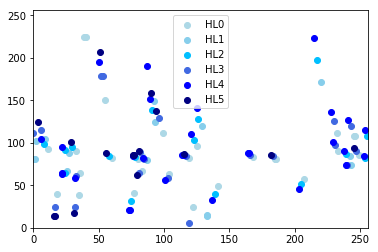

In [49]:
# The above plots are for test data set as d0_300.
# Let's try for two more samples. 
# d0_500
# 

plotLayersSinglePlot(np.swapaxes(test_data[0], 0, 2), show=True)


# Groundtruth

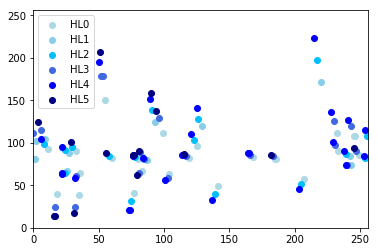

In [50]:
plotLayersSinglePlot(gt_data[0], show=True)

# Output 

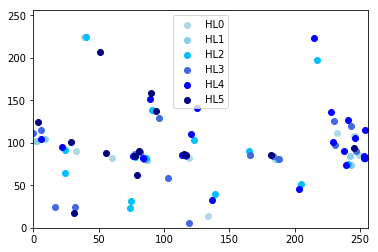

In [51]:
plotLayersSinglePlot(filtered, show=True)

In [ ]:
#You can change the data from 300 to any other name based on the availability on the data set.

# Below data is for new autoencoder model which is trained on 8 samples of data set

# Model with 8 samples of data set

In [52]:
import json
from pprint import pprint
import pickle
import matplotlib.pyplot as plt
from plotLayer import *
from preprocess import *

import os
import time
import numpy as np
from scipy import sparse as sp
from skimage.measure import block_reduce
from skimage.measure import compare_ssim as ssim

from model import *
from keras.backend.tensorflow_backend import set_session

def mse(A, B):
    err = np.sum((A.astype("float") - B.astype("float")) ** 2)
    err /= float(A.shape[1] * A.shape[2])
    return err

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

test_file_path = "../Data/testdataset/d0_sparse_dataset0500.dat"


#test_file_path = "../Data/testdataset/d0_sparse_dataset0500.dat"


#This is the model which Jason has created. 

unet_weights_path = "../Unet_epoch_15_batch_5.hdf5"
# Unet_epoch_20_batch_4.hdf5"

width = 256
ratio = 1024 / width

config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.gpu_options.per_process_gpu_memory_fraction = 0.9
sess = tf.Session(config=config)
set_session(sess)

unet_model = Unet(input_size=(width,width,6), batch_normal=True)
unet_model.load_weights(unet_weights_path)

with open(test_file_path, "rb") as f:
    data = pickle.load(f)
vdata = data[0:1]

test_data = np.heaviside(np.array([map(lambda x: block_reduce(x.toarray(), block_size=(ratio,ratio), func=np.max), d.hL) for d in vdata]), 0)
gt_data = np.heaviside(np.array([map(lambda x: block_reduce(x.toarray(), block_size=(ratio,ratio), func=np.max), d.gthL) for d in vdata]), 0)
label_data = np.array([d.label for d in vdata])

# swap the axis since the data shape for CNN is (width, width, channel)
# but the original shape (num_of_images, channel, width, width)
test_data = np.swapaxes(test_data, 1, 3)

reconstruct = unet_model.predict(test_data[0:1], verbose=1)
reconstruct = np.swapaxes(reconstruct, 1, 3)
print(reconstruct.shape)
print(gt_data.shape)

###############################
#
# Save reconstructed file
#
###############################
with open("save_output.dat","wb") as f:
    pickle.dump((reconstruct, gt_data), f)

filtered = np.copy(reconstruct[0])
#PlotImage(np.swapaxes(test_data[0], 0, 2), gt_data[0], show=True)
# plt.show()
min_threshold = 0
min_err = 99999

for threshold in np.arange(0.5, 1.01, 0.05):
    filtered[filtered < threshold] = 0
    err = mse(filtered, gt_data[0])
    if err < min_err:
        min_err = err
        min_threshold = threshold
    print("threshold:%f mse:%f" %(threshold, err))

print("min threshold:%f mse:%f" %(min_threshold, min_err))

filtered = reconstruct[0]
filtered[filtered < min_threshold] = 0




__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 256, 256, 6)  0                                            
__________________________________________________________________________________________________
conv2d_277 (Conv2D)             (None, 256, 256, 64) 3520        input_13[0][0]                   
__________________________________________________________________________________________________
batch_normalization_265 (BatchN (None, 256, 256, 64) 256         conv2d_277[0][0]                 
__________________________________________________________________________________________________
conv2d_278 (Conv2D)             (None, 256, 256, 64) 36928       batch_normalization_265[0][0]    
__________________________________________________________________________________________________
batch_norm

1/1 [==============================] - 2s 2s/step
(1, 6, 256, 256)
(1, 6, 256, 256)
threshold:0.500000 mse:0.000444
threshold:0.550000 mse:0.000527
threshold:0.600000 mse:0.000658
threshold:0.650000 mse:0.000724
threshold:0.700000 mse:0.000819
threshold:0.750000 mse:0.000946
threshold:0.800000 mse:0.001076
threshold:0.850000 mse:0.001238
threshold:0.900000 mse:0.001467
threshold:0.950000 mse:0.001770
threshold:1.000000 mse:0.001801
min threshold:0.500000 mse:0.000444


# Input data


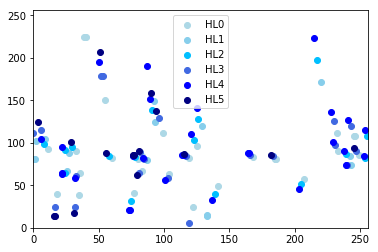

In [53]:
plotLayersSinglePlot(np.swapaxes(test_data[0], 0, 2), show=True)

# Groundtruth

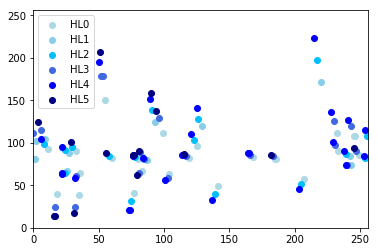

In [54]:
plotLayersSinglePlot(gt_data[0], show=True)

# Output

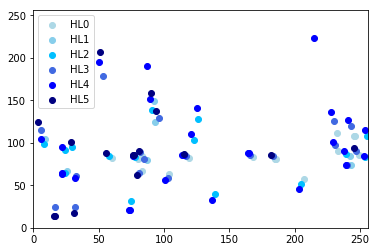

In [55]:
plotLayersSinglePlot(filtered, show=True)

# Training loss when I'm using the model with 8 samples

__________________________________________________________________________________________________
Train autoencoder
Epoch 1/1
5/5 [==============================] - 309s 62s/step - loss: 0.0016 - acc: 0.9999


Training loss checking on a new data set


__________________________________________________________________________________________________
Train autoencoder
Epoch 1/1
5/5 [==============================] - 304s 61s/step - loss: 0.0017 - acc: 0.9999


Please find the path on server 19: 
/home/sriram/Enhance_Unet



Please find the files respectively train.py train3.py for the above 2 experiments 

# Training loss when I'm using the base model

__________________________________________________________________________________________________
Train autoencoder
Epoch 1/1
5/5 [==============================] - 308s 62s/step - loss: 0.6932 - acc: 0.6289


Training loss checking on a new data set



Train autoencoder
Epoch 1/1
5/5 [==============================] - 314s 63s/step - loss: 0.6929 - acc: 0.6307






Please find the path on server 19:
    /home/sriram/Enhance_Unet



Please find the files respectively train2.py train4.py for the above 2 experiments 
